# Water Potability Prediction
## Name: Kumara Swami Thota 
## Student id: 11899046

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import warnings



In [2]:
df_water = pd.read_csv("/Users/Desktop/water_potability.csv")

In [3]:
df_water.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df_water.tail()

ph    Hardness        Solids  Chloramines     Sulfate  \
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1

In [5]:
df_water.shape

(3276, 10)

In [6]:
df_water.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df_water.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [8]:
df_water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [9]:
df_water.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [10]:
df_water.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

# Target Variable analysis 

In [11]:
df_water["Potability"].unique()

array([0, 1])

In [12]:
df_water.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [13]:
labels = ['Not Potable', 'Potable']
values = [df_water[df_water["Potability"]==0].shape[0], df_water[df_water["Potability"]==1].shape[0]]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5, title="Potability")])
fig.show()

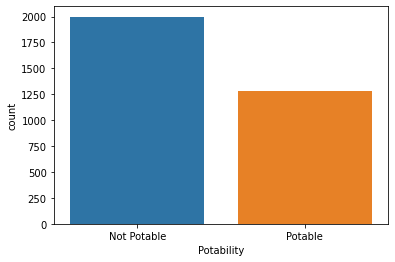

In [14]:
ax = sns.countplot(x = "Potability",data= df_water, saturation=0.8)
plt.xticks(ticks=[0, 1], labels = ["Not Potable", "Potable"])
plt.show()



# Null Value Analysis 

In [15]:
df_water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [16]:
#replacing null values with mean

df_water["ph"]=df_water["ph"].fillna(df_water["ph"].mean())
df_water["Sulfate"]=df_water["Sulfate"].fillna(df_water["Sulfate"].mean())
df_water["Trihalomethanes"]=df_water["Trihalomethanes"].fillna(df_water["Trihalomethanes"].mean())

In [17]:
df_water.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<AxesSubplot:>

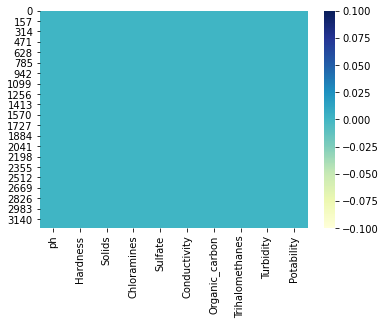

In [18]:


sns.heatmap(df_water.isnull(), cmap='YlGnBu')



# Histograms 

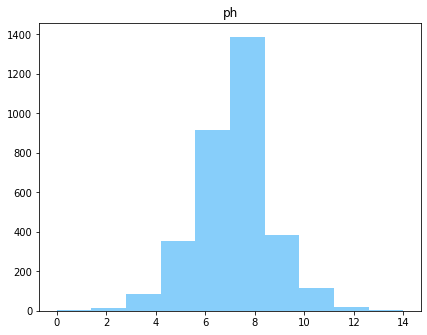

In [19]:
plt.subplot(1,3,1)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("ph")
plt.hist(df_water["ph"], color="#87CEFA")
plt.show()

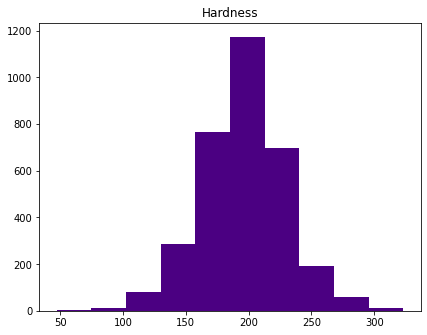

In [20]:
plt.subplot(1,3,2)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Hardness")
plt.hist(df_water["Hardness"], color="#4B0082")
plt.show()

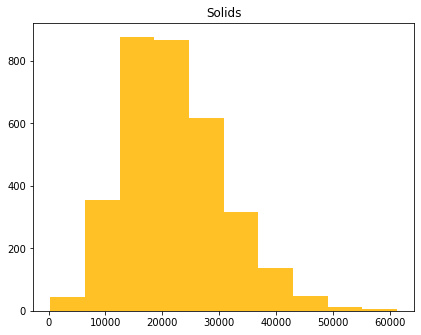

In [21]:
plt.subplot(1,3,3)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Solids")
plt.hist(df_water["Solids"], color="#FFC125")
plt.show()

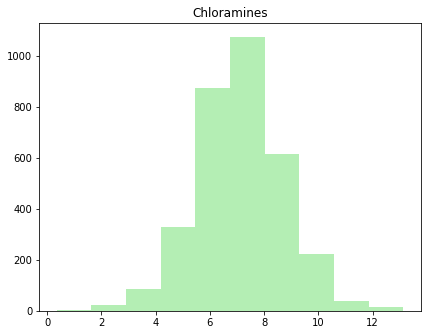

In [22]:
plt.subplot(1,3,3)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Chloramines")
plt.hist(df_water["Chloramines"], color='#B4EEB4')
plt.show()

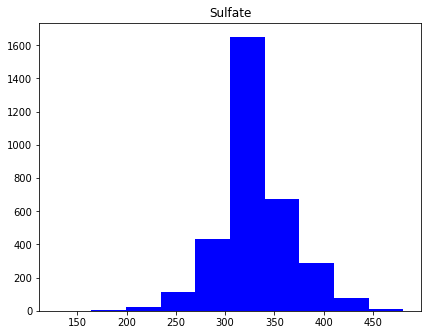

In [23]:
plt.subplot(1,3,3)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Sulfate")
plt.hist(df_water["Sulfate"], color='#0000FF')
plt.show()

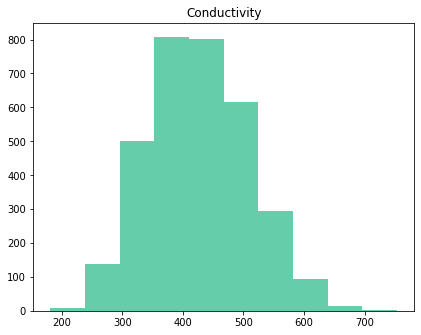

In [24]:
plt.subplot(1,3,3)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Conductivity")
plt.hist(df_water["Conductivity"], color='#66CDAA')
plt.show()

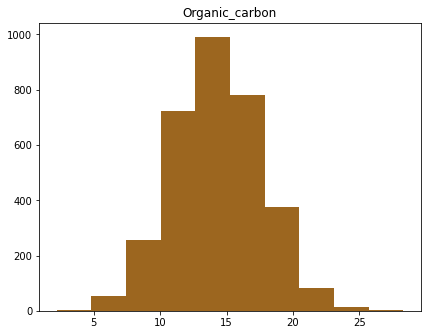

In [25]:
plt.subplot(1,3,3)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Organic_carbon")
plt.hist(df_water["Organic_carbon"], color = '#9C661F')
plt.show()

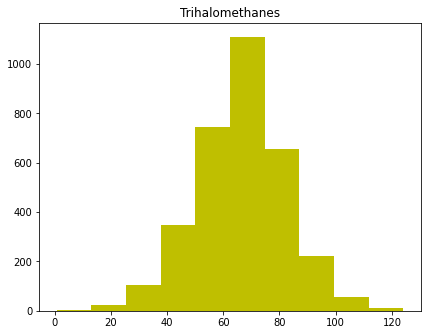

In [26]:
plt.subplot(1,3,3)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Trihalomethanes")
plt.hist(df_water["Trihalomethanes"], color='y')
plt.show()

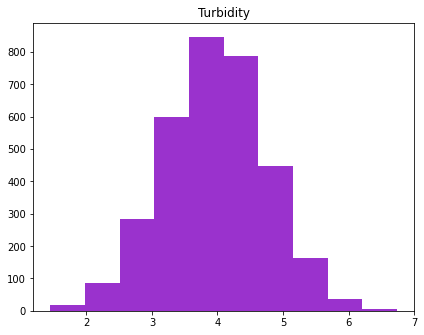

In [27]:
plt.subplot(1,3,3)
plt.subplots_adjust(left=0,right=3,bottom=1,top=2,wspace=0.2,hspace=0.4)
plt.title("Turbidity")
plt.hist(df_water["Turbidity"], color='#9A32CD')
plt.show()

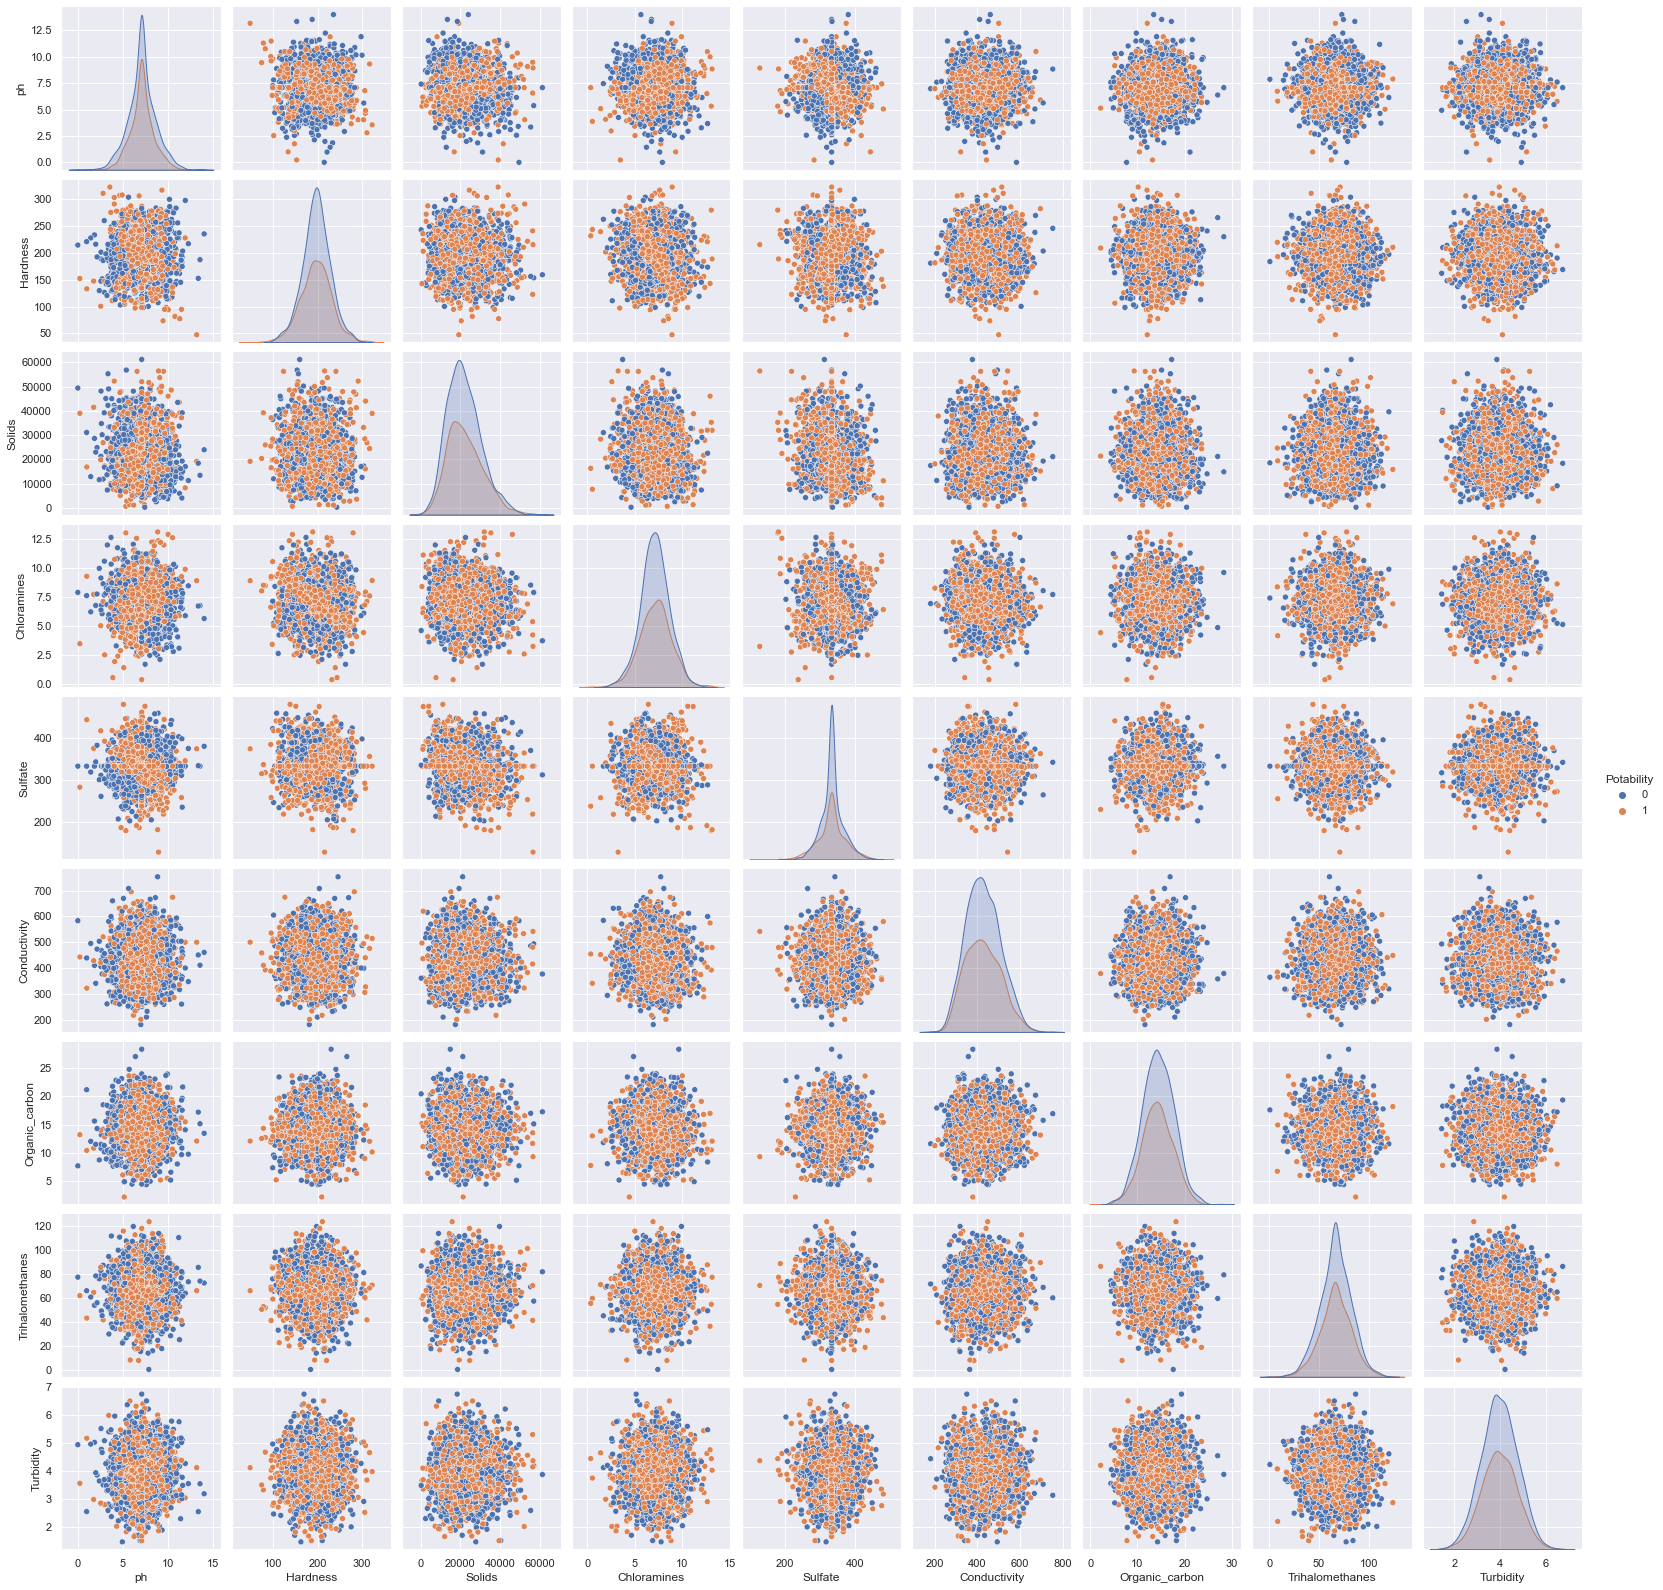

In [28]:
#pairplot 
sns.set()
sns.pairplot(df_water, hue="Potability")

## Correlation

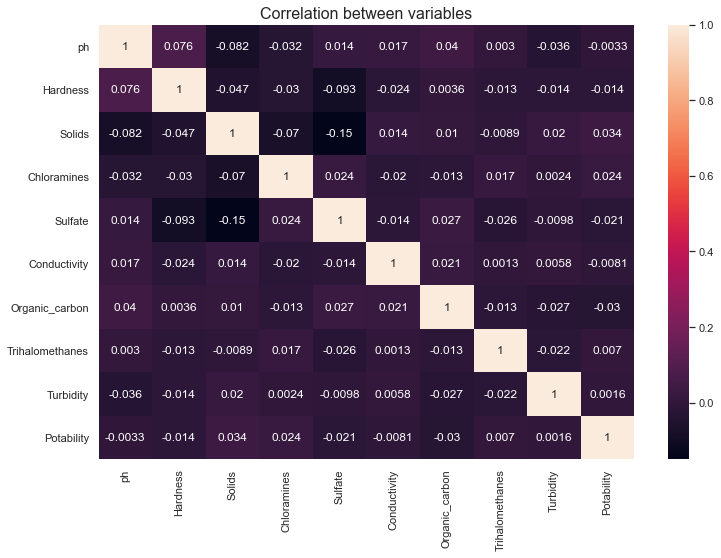

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df_water.corr(), annot=True)
plt.title("Correlation between variables", size=16)
plt.show()

In [30]:
df_water.corr()

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.075833 -0.081884    -0.031811  0.014403   
Hardness         0.075833  1.000000 -0.046899    -0.030054 -0.092766   
Solids          -0.081884 -0.046899  1.000000    -0.070148 -0.149840   
Chloramines     -0.031811 -0.030054 -0.070148     1.000000  0.023791   
Sulfate          0.014403 -0.092766 -0.149840     0.023791  1.000000   
Conductivity     0.017192 -0.023915  0.013831    -0.020486 -0.014059   
Organic_carbon   0.040061  0.003610  0.010242    -0.012653  0.026909   
Trihalomethanes  0.002994 -0.012690 -0.008875     0.016627 -0.025605   
Turbidity       -0.036222 -0.014449  0.019546     0.002363 -0.009790   
Potability      -0.003287 -0.013837  0.033743     0.023779 -0.020619   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  \
ph                   0.017192        0.040061         0.002994  -0.036222   
Hardness            -0.023915        0.003610        -0.012690  -0.014449   
Solids               0.013831        0.010242        -0.008875   0.019546   
Chloramines         -0.020486       -0.012653         0.016627   0.002363   
Sulfate             -0.014059        0.026909        -0.025605  -0.009790   
Conductivity         1.000000        0.020966         0.001255   0.005798   
Organic_carbon       0.020966        1.000000        -0.012976  -0.027308   
Trihalomethanes      0.001255       -0.012976         1.000000  -0.021502   
Turbidity            0.005798       -0.027308        -0.021502   1.000000   
Potability          -0.008128       -0.030001         0.006960   0.001581   

                 Potability  
ph                -0.003287  
Hardness          -0.013837  
Solids             0.033743  
Chloramines        0.023779  
Sulfate           -0.020619  
Conductivity      -0.008128  
Organic_carbon    -0.030001  
Trihalomethanes    0.006960  
Turbidity          0.001581  
Potability         1.000000

## Train-Test Split

In [31]:
X = df_water.drop("Potability", axis=1)
y = df_water["Potability"]

In [32]:
#Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [33]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2293, 9)
(983, 9)
(2293,)
(983,)


## Classification algorithms 

In [48]:
#importing libraries 


#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

## RandomForest 

In [49]:
RfC=RandomForestClassifier(random_state=42).fit(X_train, y_train)
pred_RfC=RfC.predict(X_test)

The accuracy of RandomForestClassifier is : 0.688708036622584


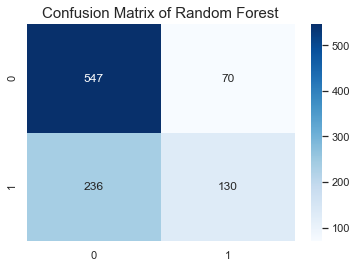

In [50]:
print("The accuracy of RandomForestClassifier is :",accuracy_score(pred_RfC,y_test))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, pred_RfC), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of Random Forest", size=15)
plt.show()

## XGBoost Classifier

In [51]:
XgB=XGBClassifier(random_state=42).fit(X_train, y_train)
pred_XgB=XgB.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[15:38:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The accuracy of XGBoost is : 0.6632756866734486


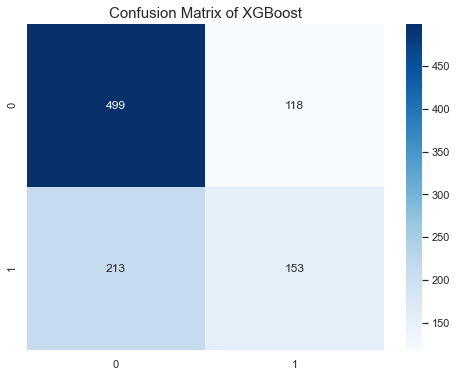

In [52]:
print("The accuracy of XGBoost is :",accuracy_score(pred_XgB,y_test))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, pred_XgB), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of XGBoost", size=15)
plt.show()

## KNN Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
Knn=KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
pred_Knn=Knn.predict(X_test)

The accuracy of RandomForestClassifier is : 0.6531027466937945


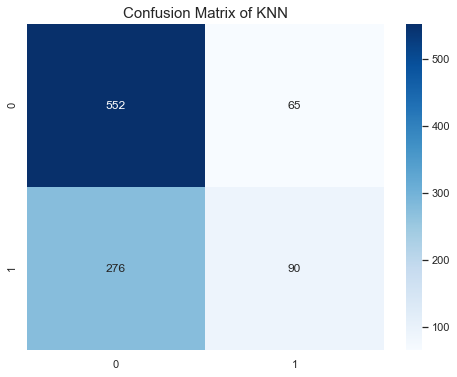

In [55]:
print("The accuracy of RandomForestClassifier is :",accuracy_score(pred_Knn,y_test))
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, pred_Knn), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix of KNN", size=15)
plt.show()